**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)



**LOAD DATA SET**

In [ ]:
df = pd.read_csv("zomato.csv")
print("Dataset Shape:", df.shape)
print(df.head())
print(df.info())


Dataset Shape: (7105, 12)
   Unnamed: 0.1  Unnamed: 0     restaurant name restaurant type  \
0             0           0        #FeelTheROLL     Quick Bites   
1             1           1          #L-81 Cafe     Quick Bites   
2             2           2             #refuel            Cafe   
3             3           3  '@ Biryani Central   Casual Dining   
4             4           4          '@ The Bbq   Casual Dining   

   rate (out of 5)  num of ratings  avg cost (two people) online_order  \
0              3.4               7                  200.0           No   
1              3.9              48                  400.0          Yes   
2              3.7              37                  400.0          Yes   
3              2.7             135                  550.0          Yes   
4              2.8              40                  700.0          Yes   

  table booking                                      cuisines type  \
0            No                                         

**REMOVE UNNECESSARY COLUMN**

In [ ]:
for col in ['Unnamed: 0', 'Unnamed: 0.1']:
    if col in df.columns:
        df.drop(columns=col, inplace=True)


**DATA CLEANING**

In [ ]:

df['rate (out of 5)'] = df['rate (out of 5)'].astype(str)
df['rate (out of 5)'] = df['rate (out of 5)'].str.replace('/5', '', regex=False)
df['rate (out of 5)'] = df['rate (out of 5)'].replace(['NEW', '-', 'nan'], np.nan)
df['rate (out of 5)'] = pd.to_numeric(df['rate (out of 5)'], errors='coerce')
df['rate (out of 5)'].fillna(df['rate (out of 5)'].median(), inplace=True)
df['avg cost (two people)'] = df['avg cost (two people)'].astype(str).str.replace(',', '', regex=False)
df['avg cost (two people)'] = pd.to_numeric(df['avg cost (two people)'], errors='coerce')
df['avg cost (two people)'].fillna(df['avg cost (two people)'].median(), inplace=True)
df['restaurant type'].fillna('Unknown', inplace=True)
df['online_order'].fillna('No', inplace=True)
df['table booking'].fillna('No', inplace=True)
df['area'].fillna('Unknown', inplace=True)
df['cuisines type'].fillna('Unknown', inplace=True)


/tmp/ipython-input-757967930.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate (out of 5)'].fillna(df['rate (out of 5)'].median(), inplace=True)
/tmp/ipython-input-757967930.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

**EXPLORATORY DATA ANALYSIS**

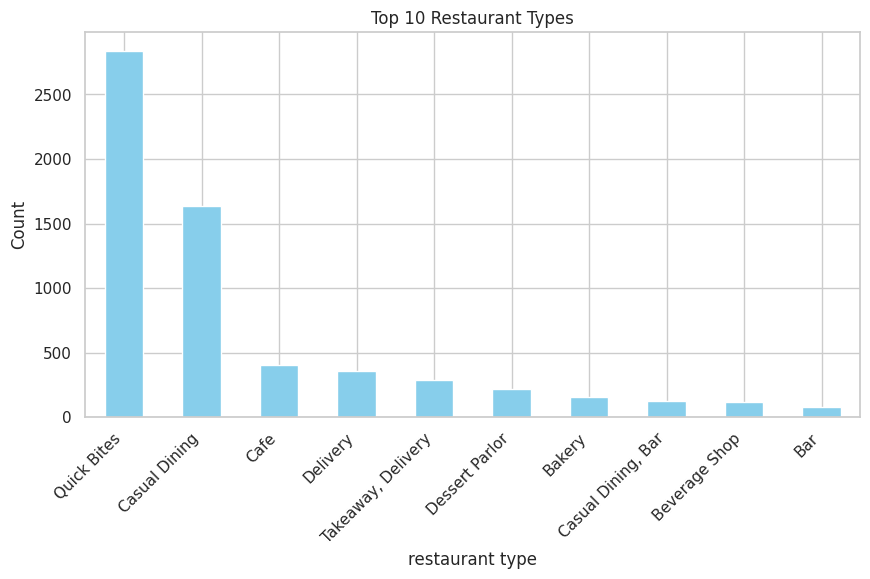

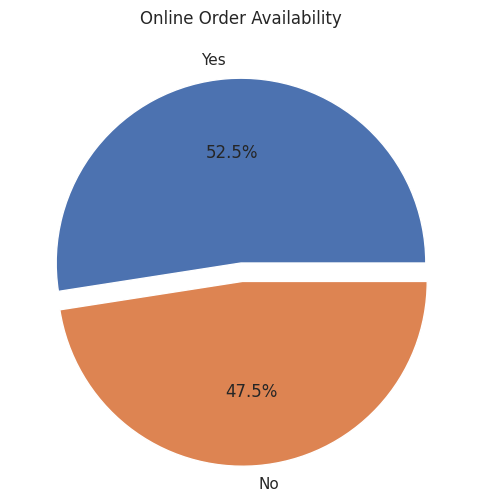

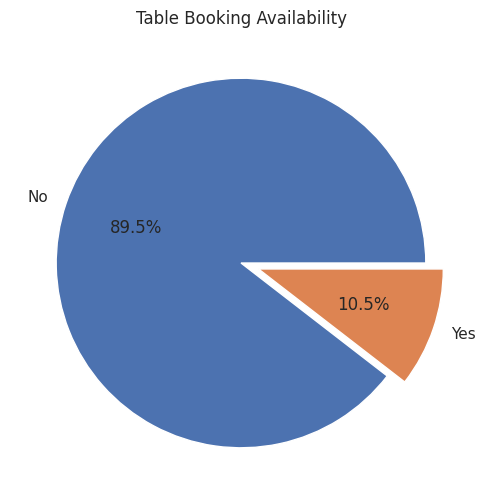

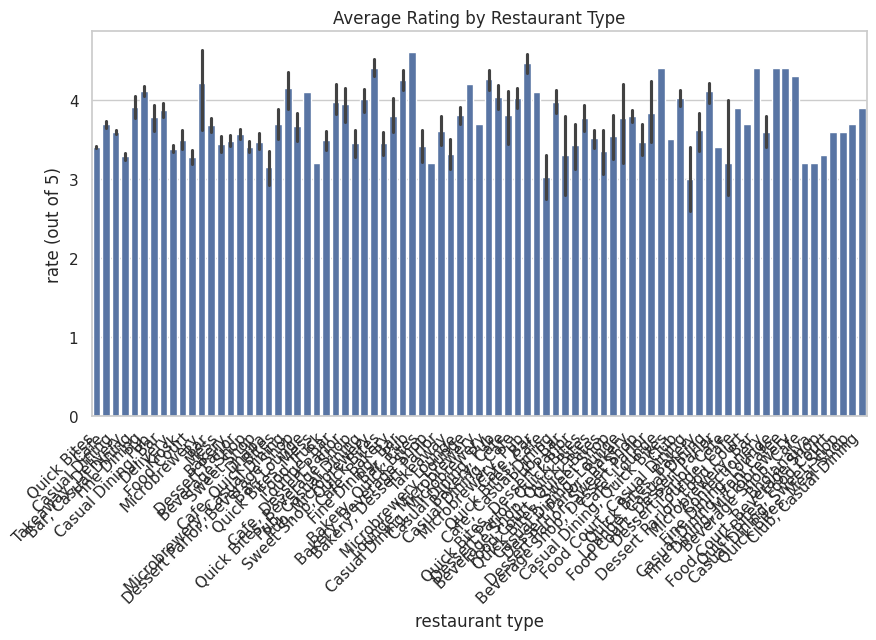

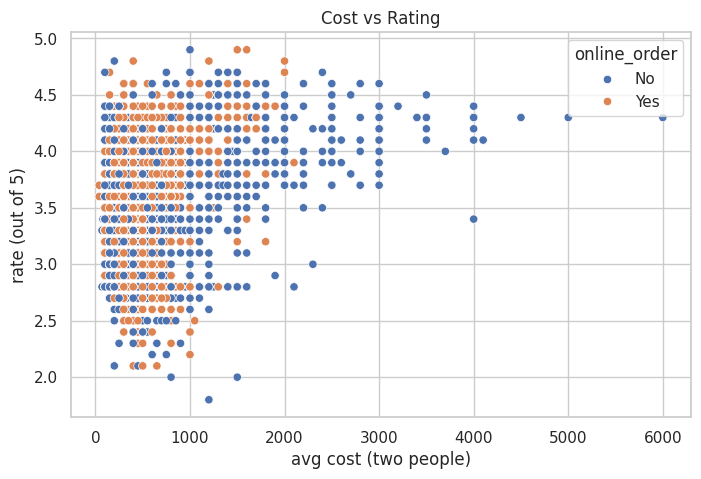

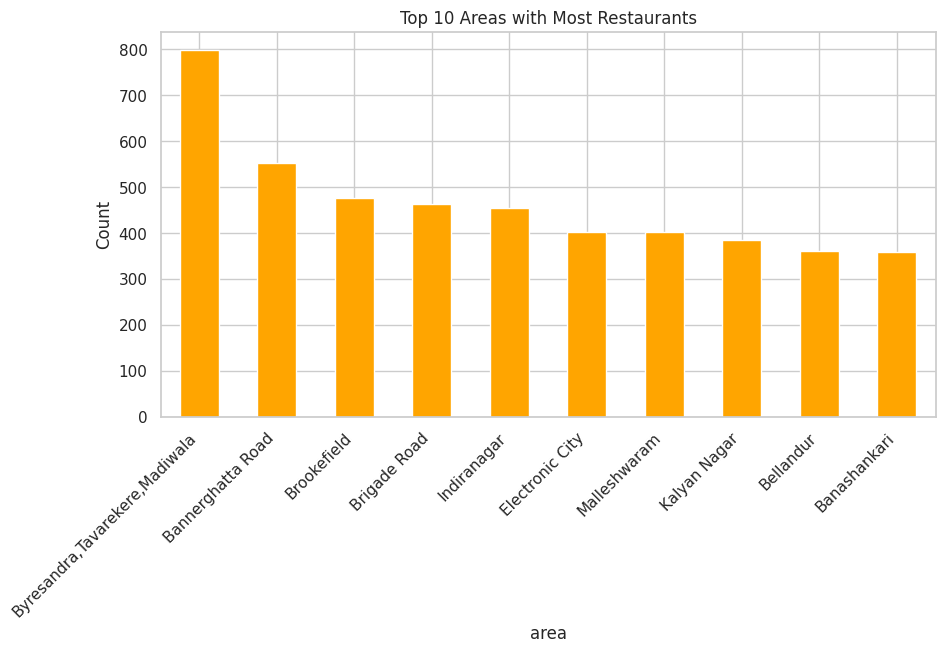

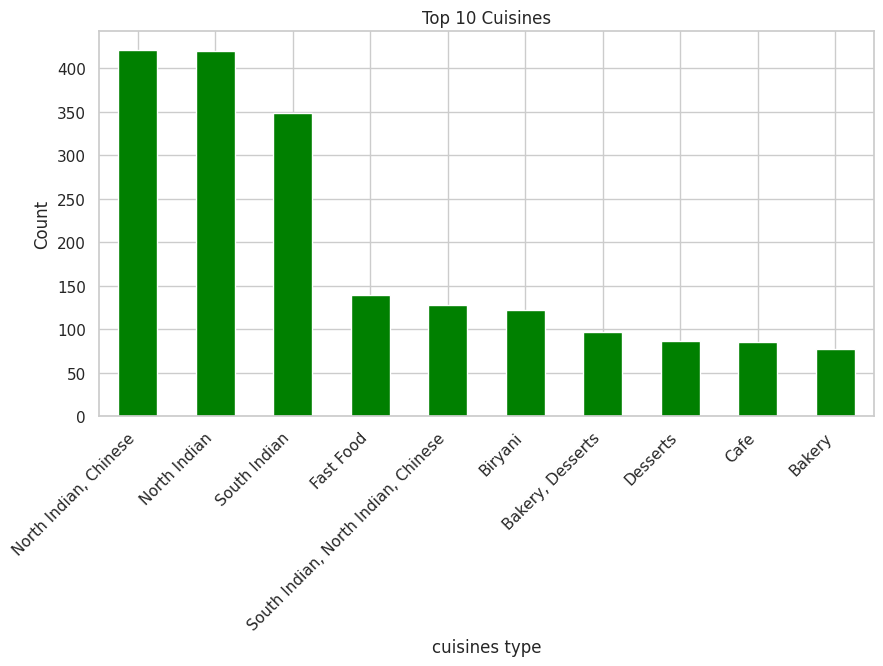

In [ ]:

plt.figure(figsize=(10,5))
df['restaurant type'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Restaurant Types')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(6,6))
df['online_order'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0,0.1])
plt.title('Online Order Availability')
plt.ylabel('')
plt.show()
plt.figure(figsize=(6,6))
df['table booking'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0,0.1])
plt.title('Table Booking Availability')
plt.ylabel('')
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(x='restaurant type', y='rate (out of 5)', data=df, estimator=np.mean)
plt.xticks(rotation=45, ha='right')
plt.title('Average Rating by Restaurant Type')
plt.show()
plt.figure(figsize=(8,5))
sns.scatterplot(x='avg cost (two people)', y='rate (out of 5)', data=df, hue='online_order')
plt.title('Cost vs Rating')
plt.show()
plt.figure(figsize=(10,5))
df['area'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Areas with Most Restaurants')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(10,5))
df['cuisines type'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Cuisines')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.show()



**ADDITIONAL** **INSIGHTS**

                                        restaurant name  rate (out of 5)
466                      Asia Kitchen By Mainland China              4.9
5271  SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...              4.9
1035                        Byg Brewski Brewing Company              4.9
4444                                 O.G. Variar & Sons              4.8
4827                                       Punjab Grill              4.8
6496                                   The Pizza Bakery              4.8
668                              Belgian Waffle Factory              4.8
7040                                            You Mee              4.7
6140                                     TBC Sky Lounge              4.7
6242                                    The Black Pearl              4.7


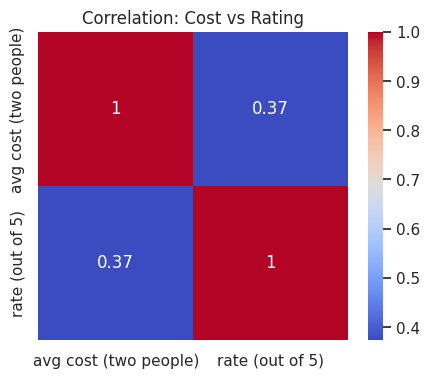

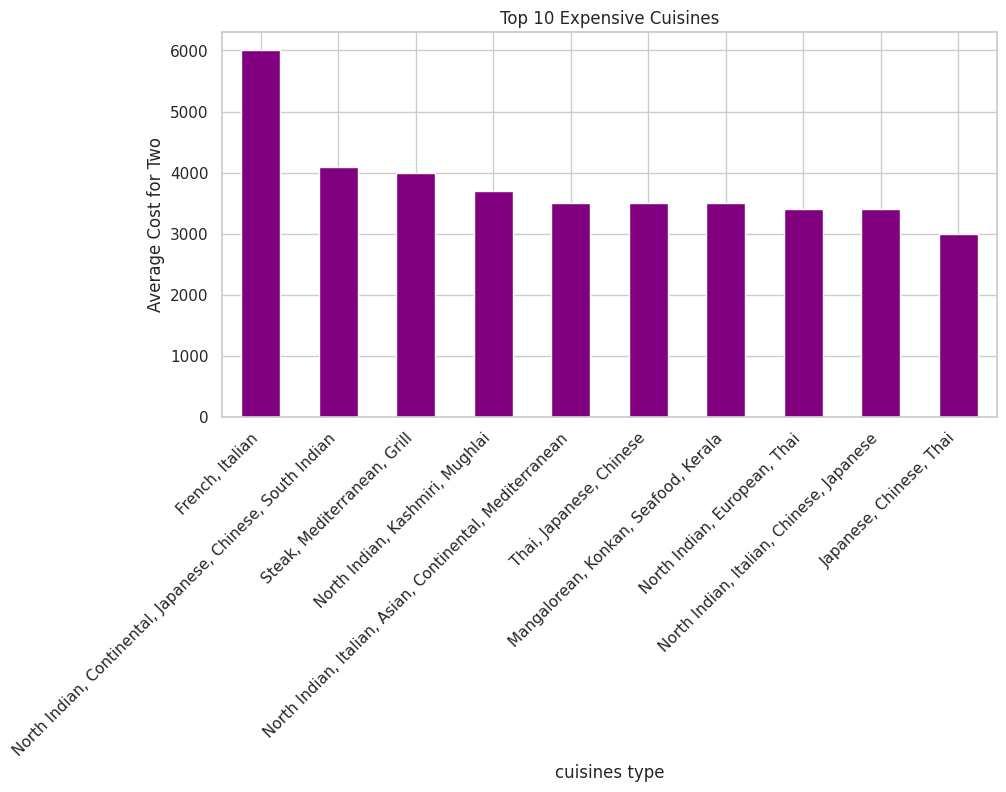

In [ ]:

top_rated = df[['restaurant name', 'rate (out of 5)']].sort_values(by='rate (out of 5)', ascending=False).head(10)
print(top_rated)
plt.figure(figsize=(5,4))
sns.heatmap(df[['avg cost (two people)', 'rate (out of 5)']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation: Cost vs Rating")
plt.show()
avg_cost_cuisine = df.groupby('cuisines type')['avg cost (two people)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
avg_cost_cuisine.plot(kind='bar', color='purple')
plt.title("Top 10 Expensive Cuisines")
plt.ylabel("Average Cost for Two")
plt.xticks(rotation=45, ha='right')
plt.show()
